# Decision Tree 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
import os
os.chdir(r"C:\Users\전우진\Desktop\2020-1\데이터마이닝\발표관련\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [3]:
# dataset 소환
data = pd.read_csv(r'./churn.csv')
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [4]:
# y 기준 내림차순 정렬
data.sort_values(by="target", ascending=True, inplace=True)

# index 재설정
data = data.reset_index(drop=True)

In [5]:
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,WI,93,area_code_415,no,no,0,152.1,141,25.86,215.5,107,18.32,262.4,111,11.81,12.0,7,3.24,1,0
2,OK,149,area_code_510,yes,no,0,180.9,79,30.75,194.9,83,16.57,197.8,109,8.90,8.8,9,2.38,3,0
3,WV,23,area_code_510,no,yes,31,156.6,84,26.62,161.5,96,13.73,294.6,107,13.26,9.4,6,2.54,1,0
4,SD,221,area_code_510,no,yes,24,180.5,85,30.69,224.1,92,19.05,205.7,103,9.26,2.4,3,0.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AZ,102,area_code_510,no,no,0,171.6,116,29.17,219.4,111,18.65,242.1,85,10.89,12.1,4,3.27,0,1
4996,TX,112,area_code_510,no,no,0,242.1,69,41.16,235.2,150,19.99,237.7,106,10.70,10.0,5,2.70,3,1
4997,TX,75,area_code_415,yes,no,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1,1
4998,OK,44,area_code_408,no,no,0,288.8,86,49.10,175.9,87,14.95,215.4,106,9.69,9.5,2,2.57,0,1


In [6]:
# target data 이름 넣기 #
target_att = 'target'

X = data.loc[:, data.columns != target_att]
y = data.loc[:, data.columns == target_att]

In [7]:
X

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,WI,93,area_code_415,no,no,0,152.1,141,25.86,215.5,107,18.32,262.4,111,11.81,12.0,7,3.24,1
2,OK,149,area_code_510,yes,no,0,180.9,79,30.75,194.9,83,16.57,197.8,109,8.90,8.8,9,2.38,3
3,WV,23,area_code_510,no,yes,31,156.6,84,26.62,161.5,96,13.73,294.6,107,13.26,9.4,6,2.54,1
4,SD,221,area_code_510,no,yes,24,180.5,85,30.69,224.1,92,19.05,205.7,103,9.26,2.4,3,0.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AZ,102,area_code_510,no,no,0,171.6,116,29.17,219.4,111,18.65,242.1,85,10.89,12.1,4,3.27,0
4996,TX,112,area_code_510,no,no,0,242.1,69,41.16,235.2,150,19.99,237.7,106,10.70,10.0,5,2.70,3
4997,TX,75,area_code_415,yes,no,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
4998,OK,44,area_code_408,no,no,0,288.8,86,49.10,175.9,87,14.95,215.4,106,9.69,9.5,2,2.57,0


In [740]:
# 기존 sklearn에 구현된 모델용 설정 # 

## y의 name 
target_att = 'target'

## x의 name
in_feature = list(data.columns [data.columns != target_att])

## data column 중 categorical variable 찾기
cate_col = [col for col in in_feature if not np.issubdtype(X[col].dtype, \
    np.number)]

## X의 string 값을 dummey variable로 변환 
X_dummies= pd.get_dummies(X.loc[:,in_feature], columns=cate_col)
feature_names = X_dummies.columns

## y의 string 값을 numeric으로 변환 
y, class_names = pd.factorize(data[target_att])

from sklearn.model_selection import train_test_split  
## train, test = 8:2, random split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2)

In [741]:
feature_names

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', '

In [742]:
y, class_names

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Int64Index([0, 1], dtype='int64'))

In [743]:
X_train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
406,80,0,195.6,111,33.25,221.5,122,18.83,182.0,89,...,0,0,0,0,1,0,1,0,1,0
444,66,0,239.6,120,40.73,230.3,110,19.58,153.0,82,...,0,1,0,0,1,0,1,0,1,0
1397,120,0,180.8,93,30.74,190.1,82,16.16,192.3,66,...,0,0,0,1,0,0,1,0,1,0
3518,106,0,158.6,112,26.96,220.0,114,18.70,252.9,106,...,0,0,0,0,1,0,1,0,1,0
865,123,0,209.4,49,35.60,237.4,117,20.18,239.2,98,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,8,0,176.0,97,29.92,234.2,136,19.91,193.5,134,...,0,0,0,0,1,0,1,0,1,0
2558,120,31,153.5,83,26.10,219.1,96,18.62,237.4,76,...,0,0,0,0,1,0,1,0,0,1
2897,93,0,179.3,93,30.48,178.6,98,15.18,225.2,131,...,0,0,0,0,1,0,1,0,1,0
114,131,0,240.9,108,40.95,167.4,91,14.23,322.2,109,...,0,0,0,1,0,0,1,0,1,0


## 여기서 부터 "구현한" 코드에 대한 설명 ##

### 경로설정 ###

In [744]:
import os
os.chdir(r"C:\Users\전우진\Desktop\2020-1\데이터마이닝\발표관련\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 

In [745]:
os.getcwd()

'C:\\Users\\전우진\\Desktop\\2020-1\\데이터마이닝\\발표관련\\tree_gain_ratio\\modules'

### 파일 컴파일 ###

In [746]:
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils

### 기본 파라미터 설정 및 데이터 스플릿 ###

In [747]:
# DT termination criteria #
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음
# -> MAX_DEPTH는 변경불가 
MAX_DEPTH = 1000

sample_ratio = 0.02
min_sample_leaf = round(sample_ratio * len(X_train))

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train.index, X_test.index
train, test = data.loc[train_idx,:], data.loc[test_idx,:]

# 추가된 부분1
> 이쪽부터 코드가 추가 되었습니다. 

아래 세 코드는 실제 y의 class별 분포 및 갯수를 확인하기 위함 

In [748]:
# 이 부분 꼭 해주어야함 #
train = train.sort_index()
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,WI,93,area_code_415,no,no,0,152.1,141,25.86,215.5,107,18.32,262.4,111,11.81,12.0,7,3.24,1,0
2,OK,149,area_code_510,yes,no,0,180.9,79,30.75,194.9,83,16.57,197.8,109,8.90,8.8,9,2.38,3,0
3,WV,23,area_code_510,no,yes,31,156.6,84,26.62,161.5,96,13.73,294.6,107,13.26,9.4,6,2.54,1,0
4,SD,221,area_code_510,no,yes,24,180.5,85,30.69,224.1,92,19.05,205.7,103,9.26,2.4,3,0.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AZ,102,area_code_510,no,no,0,171.6,116,29.17,219.4,111,18.65,242.1,85,10.89,12.1,4,3.27,0,1
4996,TX,112,area_code_510,no,no,0,242.1,69,41.16,235.2,150,19.99,237.7,106,10.70,10.0,5,2.70,3,1
4997,TX,75,area_code_415,yes,no,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1,1
4998,OK,44,area_code_408,no,no,0,288.8,86,49.10,175.9,87,14.95,215.4,106,9.69,9.5,2,2.57,0,1


In [749]:
#  실제 데이터의 class별 각 갯수 #
## original y의 class 수 ##

# data y의 이름을 넣으면 됌 #
uni_class = np.unique(data['target'])

class_number = {}
for i in uni_class:    
    class_number[i] = len(data[data['target'] == i])
    
class_number

{0: 4293, 1: 707}

In [750]:
# 실제 train 데이터의 class별 각 갯수 #

# data의 y의 이름을 넣으면 됌 #
tra_uni_class = np.unique(train['target'])
tra_class_number = {}
for i in tra_uni_class:    
    tra_class_number[i] = len(train[train['target'] == i])
    
tra_class_number

{0: 3448, 1: 552}

### 모델 생성 ###
> min sample leaf, max depth, params(entropy, gini, entropy_GR 중 하나) 순으로 알맞게 넣음

-> simplify는 꼭 True로 설정해주세요.

In [751]:
# 모델 생성 #
## min_samples_leaf: 노드의 최소 데이터 수
## MAX_DEPTH: 나무의 가지 수
## params: 분기기준 -> entropy, gini, entropy_GR 총 3개 사용가능
## simplify: 각 어떤 노드를 기준으로 child node로 분기 했을 때 child node의 분기 예측값이 같다면 분기하지않고 이전 노드를 유지함
# -> simplify는 True로 설정해주세요.

#CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy', simplify=True)
CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='gini', simplify=True)
#CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy_GR', simplify=True)

### 모델 피팅 ###
> train data와 data의 target 이름을 각각 넣음

In [752]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
gini_tree, gini_pprint_tree= CART_gini_ins.fit(train, target_attribute_name = "target")  

In [753]:
## CART_gini_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
## CART_gini_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_gini_tree, CART_gini_graph_tree = \
                CART_gini_ins.tree, CART_gini_ins.graph_tree   

# 추가된 부분2
> pred, depth, homogeneity, lift, coverage, number_of_variable 수치를 편하게 구할 수 있도록 구현함

In [754]:
## utils.get_usrt_info 코드 설명 ##
# train: data의 train data
# CART_gini_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
# target_att: data의 y이름

utils.get_usrt_info(train ,CART_gini_tree, target_att = "target")

class prior: [0.862, 0.138]
leaf node별 class수: [176, 55]
leaf node별 class수: [24, 59]
leaf node별 class수: [2583, 65]
leaf node별 class수: [376, 31]
leaf node별 class수: [47, 49]
leaf node별 class수: [16, 106]
leaf node별 class수: [128, 40]
leaf node별 class수: [53, 33]
leaf node별 class수: [45, 114]


,pred,depth,homogeneity,lift,coverage,number_of_variable
0,0,2,0.616,0.7146,0.022,2
1,1,2,0.717,5.1957,0.040,2
2,1,3,0.869,6.2971,0.030,3
3,0,3,0.762,0.8840,0.042,3
4,0,4,0.762,0.8840,0.058,4
5,1,4,0.711,5.1522,0.021,4
6,0,4,0.975,1.1311,0.662,4
7,0,5,0.924,1.0719,0.102,5
8,1,5,0.510,3.6957,0.024,5


### 그래프 생성 ###
> CART_gini_ins.graph.tree_to_graph에 CART_gini_graph_tree를 넣고 node와 edge에 대한 데이터를 생성한 뒤, \
> node와 edge에 "\n"을 덫붙여서 tree graph를 생성함.

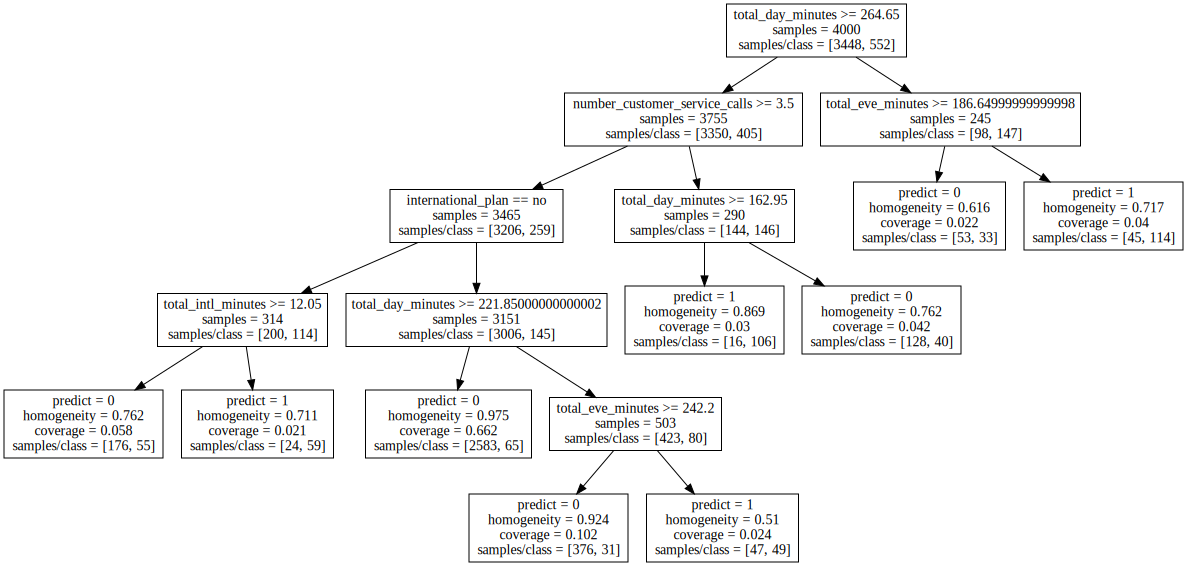

In [755]:
import graphviz
graph_dir = 'graph'
node, edge = CART_gini_ins.graph.tree_to_graph(CART_gini_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

# Churn + 숫자 설정, pdf 저장경로명 변경

In [756]:
# PDF 파일 출력 #
graph_dir = 'graph_geni'
split = 'geni'
d_set_name = 'churn_geni_30'

tree_graph.render('{}/CART_{}_{}_test'.format(graph_dir, split,d_set_name))

'graph_geni\\CART_geni_churn_geni_30_test.pdf'

## 성능 측정 ##
> CART_gini_ins.predict에 Dataframe형태의 x,y가 동시에 존재하는 train or test data와 이전에 선언한 CART_entropy_GR_tree를 넣으면, \
> predict, predict probability가 각각 생성됨 

In [757]:
# 성능측정 #
## train predict ##
train = data.loc[train_idx,:]

train_CART_gini_all_pred, train_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(train, CART_gini_tree)

## test predict ## 
test_CART_gini_all_pred, test_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(test, CART_gini_tree)

> utils.perform_check에 train or test data의 y값, predict, probability, class의 갯수,  CLASS_DICT_를 넣으면 \
> train or test data의 [accuracy, recall, precision, f1, auc] 순으로 값이 생성 


In [758]:
# y의 name 넣기 
classes = np.unique(train['target'])
 
# train metric
train_CART_gini_all_met = utils.perform_check(train['target'], \
         train_CART_gini_all_pred, \
         train_CART_gini_all_pred_prob,\
         len(classes), CART_gini_ins.CLASS_DICT_)

# test metric
test_CART_gini_all_met = utils.perform_check(test['target'], \
         test_CART_gini_all_pred, \
         test_CART_gini_all_pred_prob, \
         len(classes), CART_gini_ins.CLASS_DICT_)

In [759]:
# [accuracy, recall, precision, f1, auc] 순
train_CART_gini_all_met

[0.911,
 0.5942028985507246,
 0.7130434782608696,
 0.6482213438735178,
 0.8879493783415717]

In [760]:
# [accuracy, recall, precision, f1, auc] 순
test_CART_gini_all_met

[0.904, 0.5935483870967742, 0.736, 0.6571428571428571, 0.873491124260355]

### [accuracy, recall, precision, f1, auc] 순

In [761]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(train_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.911, RECALL :0.594, PRECISION : 0.713, F1 : 0.648, AUC : 0.888


In [762]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(test_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.904, RECALL :0.594, PRECISION : 0.736, F1 : 0.657, AUC : 0.873


## 구현한 코드 모델과 기존 sklearn 모델과 비교하고 싶으면 아래를 참조해주세요

In [763]:
# split criterion이 gini일 때 #
from sklearn.tree import DecisionTreeClassifier

max_depth = 1000
sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(X_train))

dtc =DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, random_state=0,
                                min_samples_leaf=min_sample_leaf) 

dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [764]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

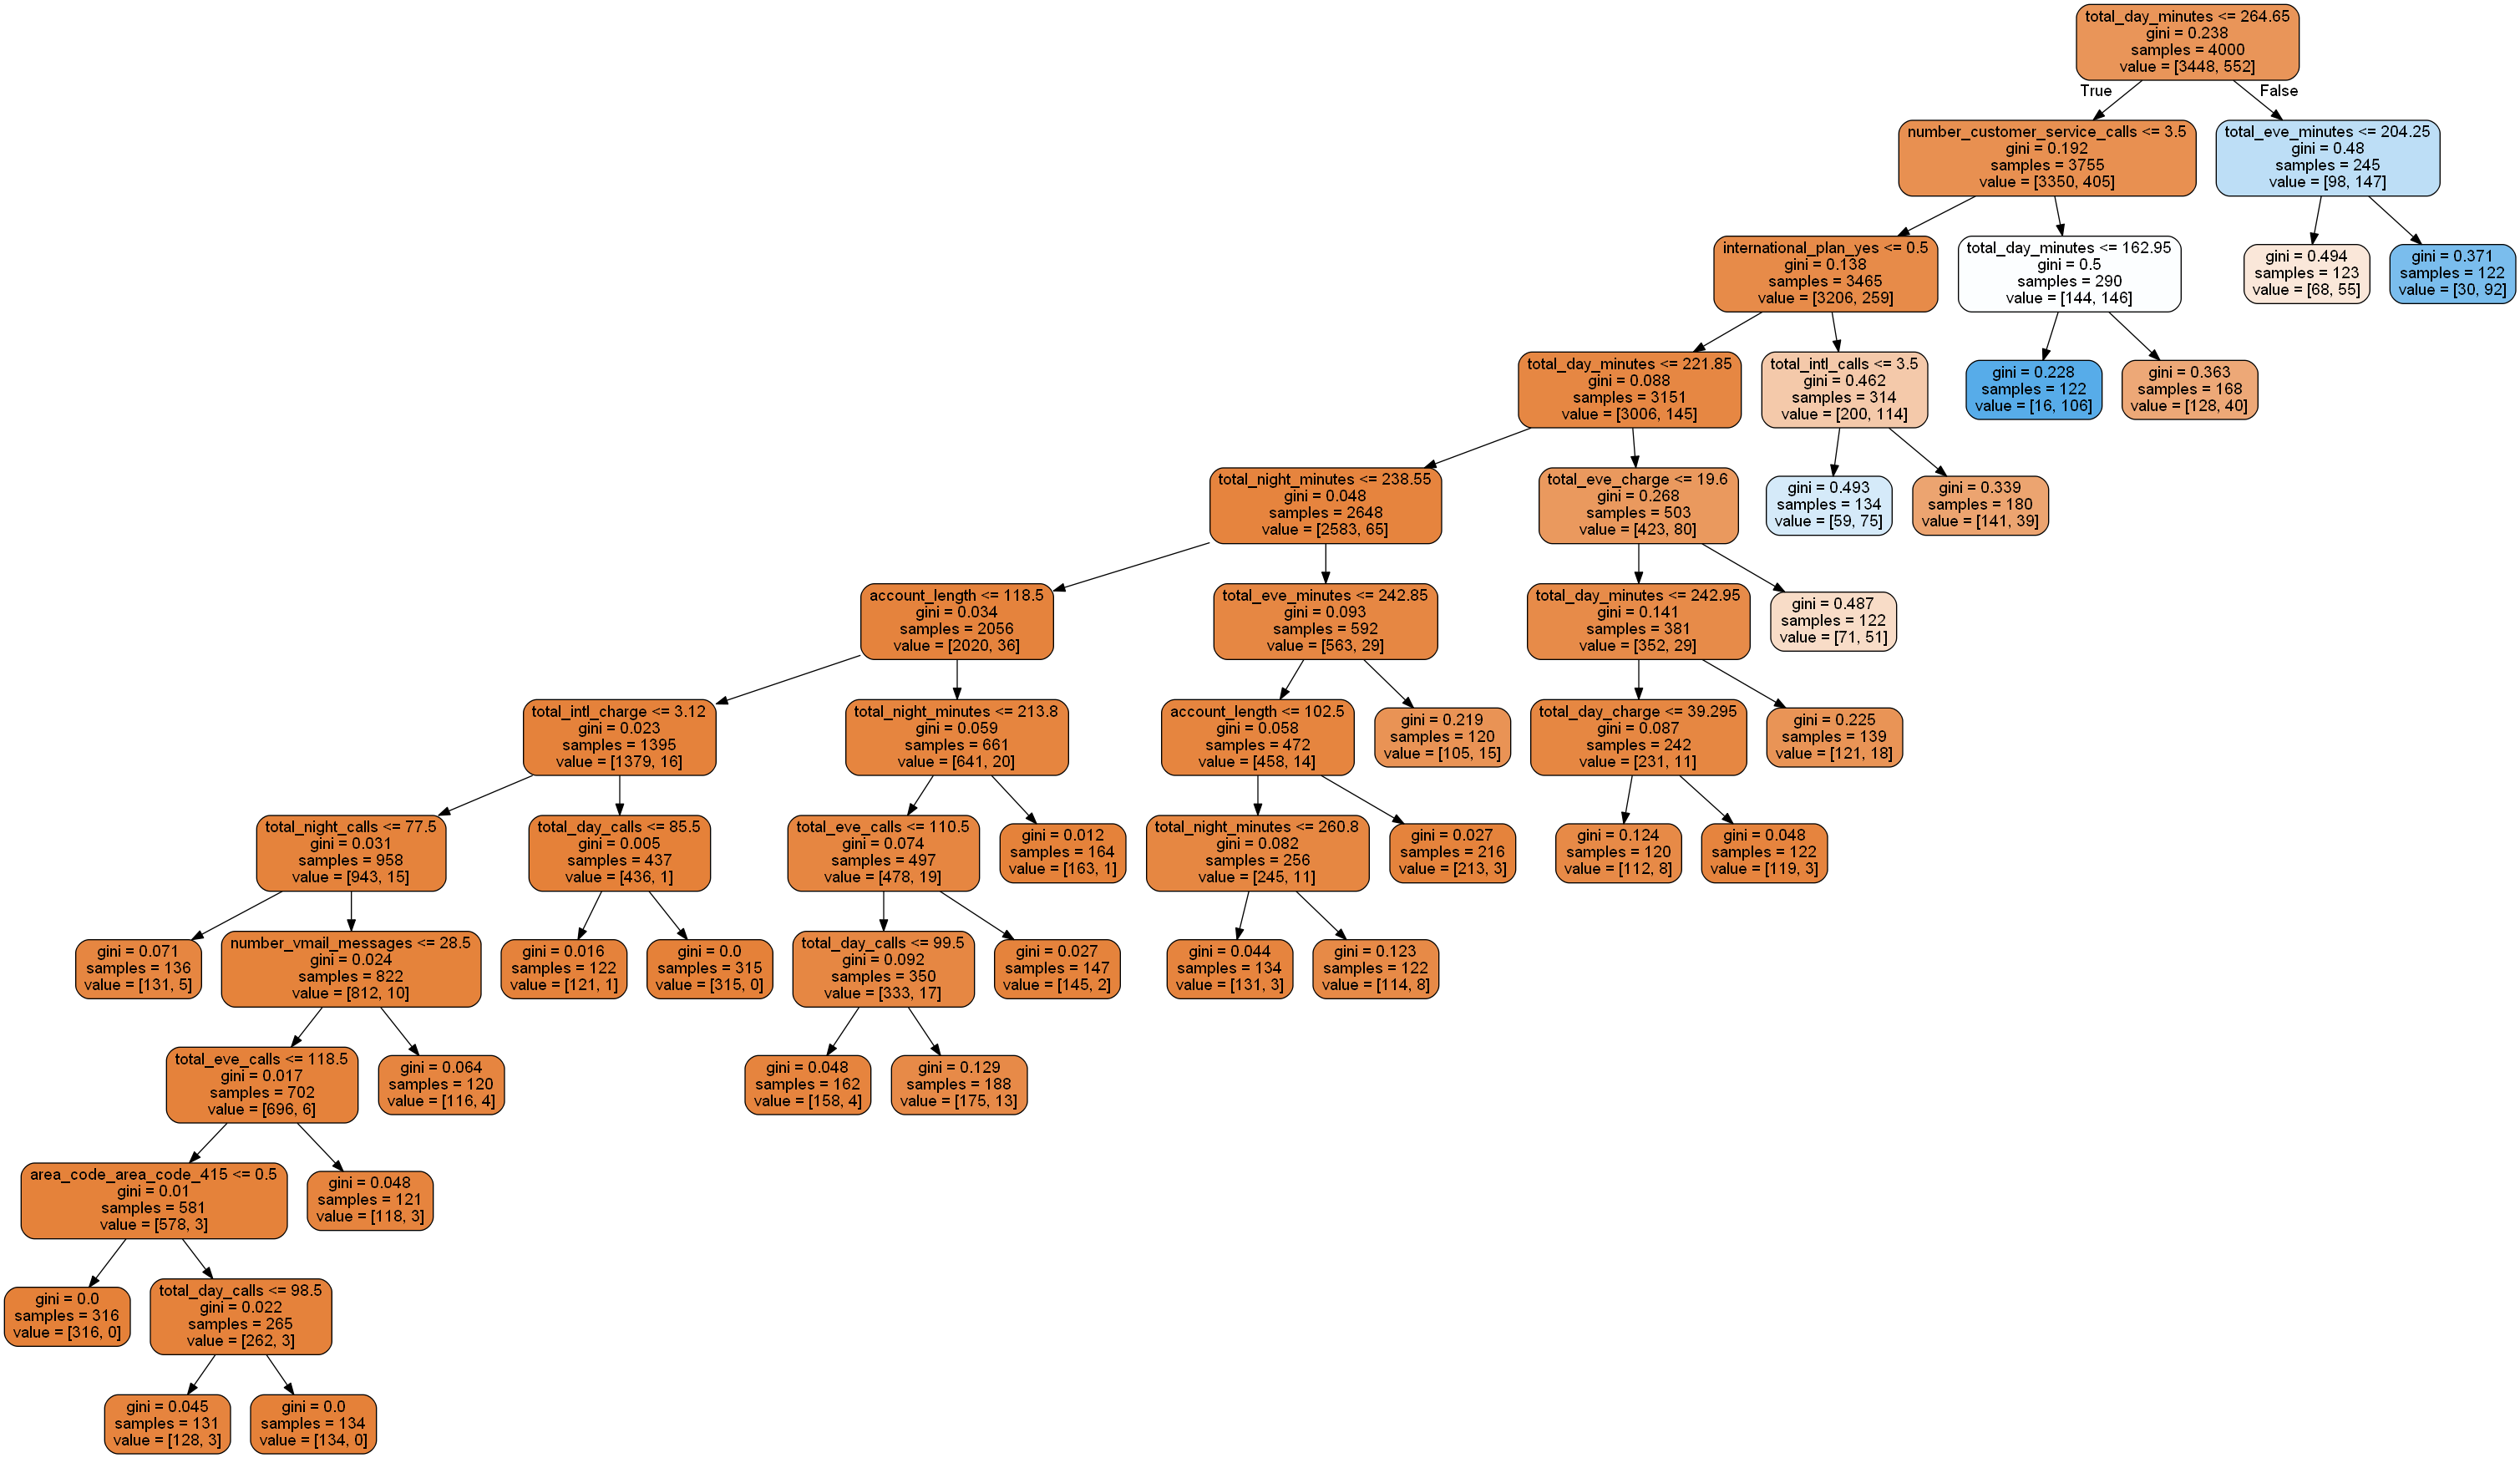

In [765]:
# 문자열 데이터를 저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(dtc, feature_names=X_train.columns, out_file = dot_file, \
                     filled =True, rounded=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())